<a href="https://colab.research.google.com/github/HagarIbrahiem/Learning_purposes/blob/main/EDA_Scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

At the dataset , there would be multiple features spanning varying degrees of magnitude, range, and units. This is a significant obstacle as a few machine learning algorithms are highly sensitive to these features, i.e., most algorithms work well only on a normal distribution. So how can we use these features when they vary so vastly in terms of what they’re presenting?In this notebook we will cover 
- scaling, 
- transformations, and 
- interactive features

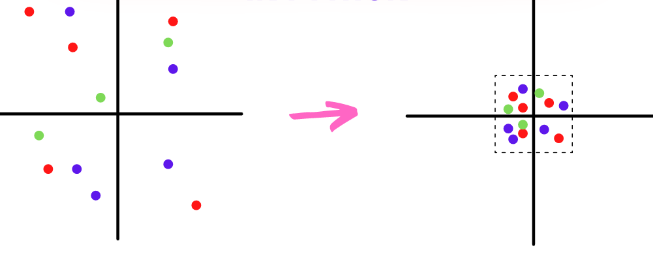

**Gradient Descent Based Algorithms**

Machine learning algorithms like linear regression, logistic regression, neural network, PCA (principal component analysis), etc., that use gradient descent as an optimization technique require data to be scaled. 

 The difference in the ranges of features will cause different step sizes for each feature. To ensure that the gradient descent moves smoothly towards the minima and that the steps for gradient descent are updated at the same rate for all the features, we scale the data before feeding it to the model.

**Distance-Based Algorithms**

Distance algorithms like KNN, K-means clustering, and SVM(support vector machines) are most affected by the range of features. This is because, behind the scenes, they are using distances between data points to determine their similarity.

**Tree-Based Algorithms**
Tree-based algorithms, on the other hand, are fairly insensitive to the scale of the features. Think about it, a decision tree only splits a node based on a single feature. The decision tree splits a node on a feature that increases the homogeneity of the node. Other features do not influence this split on a feature.

So, the remaining features have virtually no effect on the split. This is what makes them invariant to the scale of the features!

##Is Feature Scaling actually helpful?

Let’s look at an example of a College Admission dataset, in which your goal is to predict the chance of admission for each student based on the other features given.

You can download the dataset from the link below.
[link](https://www.kaggle.com/mohansacharya/graduate-admissions)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [5]:
import pandas as pd
df = pd.read_csv("Admission_Predict.csv")
df.head()

The dataset has a wide variety of features with different ranges. The first column Serial No. is not important, so I am going to be deleting it. Then I am splitting the dataset into training and test dataset.

In [101]:
df.drop("Serial No.",axis=1,inplace=True)
y = df['Chance of Admit ']
df.drop("Chance of Admit ",axis=1,inplace=True)

In [102]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df,y,test_size=0.2)

In [103]:
#  linear regression model, first without normalization
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)

from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(y_test,pred))
rmse

0.06842533675005649

In [104]:
#  linear regression model,  with normalization

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(df)
df = sc.transform(df)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df,y,test_size=0.2)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)


from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(y_test,pred))
rmse

0.055469593925837286

we are able to get a significant reduction in the error when we used the standardization technique.

##Features Scale Approaches


Feature scaling is important if  we are using **models with a distance metric**. If our features are of different scales, they can be overcompensated for in the models. 
- Absolute Max Scaling (Normalization)
- MinMax Scaling
- Z-Score Normalization (Standard Scaler)
- Robust Scaler 

**Load vehicles_sample Data**

In [6]:

        
from google.colab import drive
drive.mount('/content/drive')
!ls drive/'My Drive'/ML_Process_Data_Files/Section_7_Feature_Engineering  
df = pd.read_csv("drive/My Drive/ML_Process_Data_Files/Section_7_Feature_Engineering/vehicles_sample.csv")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
AB_NYC_2019.csv  airbnb_dataset_ml_process.csv	vehicles_sample.csv


In [3]:
df.head(1)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7314973697,https://reno.craigslist.org/cto/d/hayward-2006...,reno / tahoe,https://reno.craigslist.org,14500,2006.0,chevrolet,c4500 kodiak,good,NaN,...,NaN,NaN,white,https://images.craigslist.org/00r0r_2PNOZAxrzS...,2006 Chevy c4500 Duramax Diesel 12ft stake be...,NaN,ca,37.6332,-122.0971,2021-04-30T12:36:10-0700


In [4]:
df.shape

(20000, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            20000 non-null  int64  
 1   url           20000 non-null  object 
 2   region        20000 non-null  object 
 3   region_url    20000 non-null  object 
 4   price         20000 non-null  int64  
 5   year          19951 non-null  float64
 6   manufacturer  19216 non-null  object 
 7   model         19754 non-null  object 
 8   condition     11921 non-null  object 
 9   cylinders     11634 non-null  object 
 10  fuel          19869 non-null  object 
 11  odometer      19814 non-null  float64
 12  title_status  19667 non-null  object 
 13  transmission  19899 non-null  object 
 14  VIN           12485 non-null  object 
 15  drive         13903 non-null  object 
 16  size          5663 non-null   object 
 17  type          15685 non-null  object 
 18  paint_color   13881 non-nu

In [8]:
df.describe()

,id,price,year,odometer,county,lat,long
count,2.000000e+04,2.000000e+04,19951.000000,1.981400e+04,0.0,19702.000000,19702.000000
mean,7.311462e+09,1.761475e+04,2011.217282,9.865501e+04,NaN,38.483050,-94.647057
std,4.484711e+06,1.998158e+04,9.575279,2.363314e+05,NaN,5.889468,18.358730
min,7.217189e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-56.527029,-159.365530
25%,7.308054e+09,5.950000e+03,2008.000000,3.747300e+04,NaN,34.610000,-111.937599
50%,7.312474e+09,1.385000e+04,2014.000000,8.400000e+04,NaN,39.140834,-88.230050
75%,7.315259e+09,2.659000e+04,2017.000000,1.323340e+05,NaN,42.370000,-80.705055
max,7.317096e+09,1.234567e+06,2022.000000,1.000000e+07,NaN,64.878089,94.163200


In [9]:
##adding a new column (Car_age)
df['car_age'] = df['year'].max() - df['year']   ##df['year'].max() is the year of collecting data

In [10]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date', 'car_age'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            20000 non-null  int64  
 1   url           20000 non-null  object 
 2   region        20000 non-null  object 
 3   region_url    20000 non-null  object 
 4   price         20000 non-null  int64  
 5   year          19951 non-null  float64
 6   manufacturer  19216 non-null  object 
 7   model         19754 non-null  object 
 8   condition     11921 non-null  object 
 9   cylinders     11634 non-null  object 
 10  fuel          19869 non-null  object 
 11  odometer      19814 non-null  float64
 12  title_status  19667 non-null  object 
 13  transmission  19899 non-null  object 
 14  VIN           12485 non-null  object 
 15  drive         13903 non-null  object 
 16  size          5663 non-null   object 
 17  type          15685 non-null  object 
 18  paint_color   13881 non-nu

In [12]:
df.describe()

,id,price,year,odometer,county,lat,long,car_age
count,2.000000e+04,2.000000e+04,19951.000000,1.981400e+04,0.0,19702.000000,19702.000000,19951.000000
mean,7.311462e+09,1.761475e+04,2011.217282,9.865501e+04,NaN,38.483050,-94.647057,10.782718
std,4.484711e+06,1.998158e+04,9.575279,2.363314e+05,NaN,5.889468,18.358730,9.575279
min,7.217189e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-56.527029,-159.365530,0.000000
25%,7.308054e+09,5.950000e+03,2008.000000,3.747300e+04,NaN,34.610000,-111.937599,5.000000
50%,7.312474e+09,1.385000e+04,2014.000000,8.400000e+04,NaN,39.140834,-88.230050,8.000000
75%,7.315259e+09,2.659000e+04,2017.000000,1.323340e+05,NaN,42.370000,-80.705055,14.000000
max,7.317096e+09,1.234567e+06,2022.000000,1.000000e+07,NaN,64.878089,94.163200,122.000000


In [13]:
##Select only some features for the models
##remove /null
df_example = df.loc[:,['price','car_age','odometer']].dropna()
df_example.head()

,price,car_age,odometer
0,14500,16.0,84000.0
1,9999,11.0,85971.0
2,2250,18.0,170000.0
3,9899,9.0,78664.0
4,1995,16.0,140000.0


<AxesSubplot:>

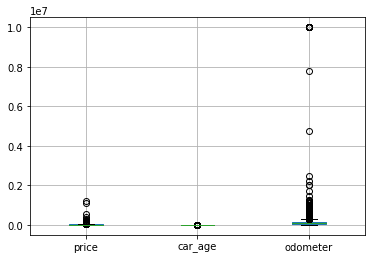

In [14]:
#Creating subplot of each column with its own scale
df_example.boxplot()

As we can see in the table above, the features Price, Car_age and Odometer are measured on different scales, so that Feature Scaling is necessary important prior to any comparison or combination of these data.

**Split Data**

It is a good practice to fit the scaler on the training data and then use it to transform the testing data. This would avoid any data leakage during the model testing process. Also, the scaling of target values is generally not required.

In [15]:
##splitting data before Scaling to avoid Data leakage
from sklearn.model_selection import train_test_split

X = df_example.drop('price' , axis=1)
y = df_example[['price']]
X_train ,X_test, y_train , y_test = train_test_split(X, y , test_size=0.2, random_state=42)

In [16]:
print(X_train.shape)
print( X_test.shape)
print(y_train.shape)
print( y_test.shape)


(15813, 2)
(3954, 2)
(15813, 1)
(3954, 1)


**Now comes the fun part – putting what we have learned into practice!**

###1-Absolute Max Scaling (Normalization)

Steps:
- Find the absolute maximum value of the feature in the dataset
- Divide all the values in the column by that maximum value


If we do this for all the numerical columns, then all their **values will lie between -1 and 1**


For absolute max scaling, this works best if:
- our data doesn't have massive outliers. In this case, we would likely want to remove outliers from price and odometer. 
- This also keeps the same distribution of the data. For absolute maximum scaling, let's do this on the year data for the cars.

In [17]:
from sklearn.preprocessing import MaxAbsScaler

#Scale data 
df_am = MaxAbsScaler().fit_transform(X_train)

#convert to dataframe to see table
df_am = pd.DataFrame(df_am, columns = X_train.columns)

#obvious problems with outliers regarding price & odometer 
df_am.describe()


,car_age,odometer
count,15813.000000,15813.000000
mean,0.088493,0.009822
std,0.079693,0.023839
min,0.000000,0.000000
25%,0.040984,0.003746
50%,0.065574,0.008389
75%,0.114754,0.013200
max,1.000000,1.000000


###2- Min Max Scaling
Another simple form of scaling is called min max. Min Max scaling **will scale all our data points between 0 and 1**. We’d use the following formula to scale our data, where we subtract the min from the raw data and then divide it by the max minus the min.

-  this approach is not robust to outliers.

In [18]:
from sklearn.preprocessing import MinMaxScaler
df_min_max = MinMaxScaler().fit_transform(X_train)
df_min_max = pd.DataFrame(df_min_max, columns = X_train.columns)

In [19]:

print('Min-value for the original data :\ncar_age={:.2f},  odometer={:.2f}'
      .format(X_train['car_age'].min(), X_train['odometer'].min()))
print('\nMax-value for the original data :\ncar_age={:.2f},  odometer={:.2f}'
      .format(X_train['car_age'].max(), X_train['odometer'].max()))


print('\nMin-value after min-max scaling:\ncar_age={:.2f},  odometer={:.2f}'
      .format(df_min_max['car_age'].min(), df_min_max['odometer'].min()))
print('\nMax-value after min-max scaling:\ncar_age={:.2f},  odometer={:.2f}'
      .format(df_min_max['car_age'].max(), df_min_max['odometer'].max()))

Min-value for the original data :
car_age=0.00,  odometer=0.00

Max-value for the original data :
car_age=122.00,  odometer=10000000.00

Min-value after min-max scaling:
car_age=0.00,  odometer=0.00

Max-value after min-max scaling:
car_age=1.00,  odometer=1.00


###3-Z Score Normalization (Standardization)
Another approach is standardization which transforms the data into the z-score, where **the mean is zero and the standard deviation is 1.**

- This approach is **more robust to outliers**, but still can have issues if outliers cause massive changes to standard deviation. 
- However, this does **assume a normal distribution** which is inaccurate for some of our data (Year).

In [20]:
from sklearn.preprocessing import StandardScaler
df_std = X_train.copy()
#only scale numeric varaibles in this case rather than the dummy variables for categories 
df_std.loc[:,['car_age','odometer']] = StandardScaler().fit_transform(df_std.loc[:, ['car_age','odometer']])

In [21]:

print('Min-value for the original data :\ncar_age={:.2f},  odometer={:.2f}'
      .format(X_train['car_age'].min().min(), X_train['odometer'].min()))
print('\nMax-value for the original data :\ncar_age={:.2f},  odometer={:.2f}'
      .format(X_train['car_age'].max(), X_train['odometer'].max()))


print('\nMin-value after min-max scaling:\ncar_age={:.2f},  odometer={:.2f}'
      .format(df_std['car_age'].min().min(), df_std['odometer'].min()))
print('\nMax-value after min-max scaling:\ncar_age={:.2f},  odometer={:.2f}'
      .format(df_std['car_age'].max(), df_std['odometer'].max()))

Min-value for the original data :
car_age=0.00,  odometer=0.00

Max-value for the original data :
car_age=122.00,  odometer=10000000.00

Min-value after min-max scaling:
car_age=-1.11,  odometer=-0.41

Max-value after min-max scaling:
car_age=11.44,  odometer=41.54


In [22]:

print('Mean-value for the original data :\ncar_age={:.2f},  odometer={:.2f}'
      .format(X_train['car_age'].mean(), X_train['odometer'].mean()))
print('\nSTD-value for the original data :\ncar_age={:.2f},  odometer={:.2f}'
      .format(X_train['car_age'].std(), X_train['odometer'].std()))


print('\nMean-value after min-max scaling:\ncar_age={:.2f},  odometer={:.2f}'
      .format(df_std['car_age'].mean(), df_std['odometer'].mean()))
print('\nSTD-value after min-max scaling:\ncar_age={:.2f},  odometer={:.2f}'
      .format(df_std['car_age'].std(), df_std['odometer'].std()))

Mean-value for the original data :
car_age=10.80,  odometer=98223.23

STD-value for the original data :
car_age=9.72,  odometer=238390.17

Mean-value after min-max scaling:
car_age=-0.00,  odometer=0.00

STD-value after min-max scaling:
car_age=1.00,  odometer=1.00


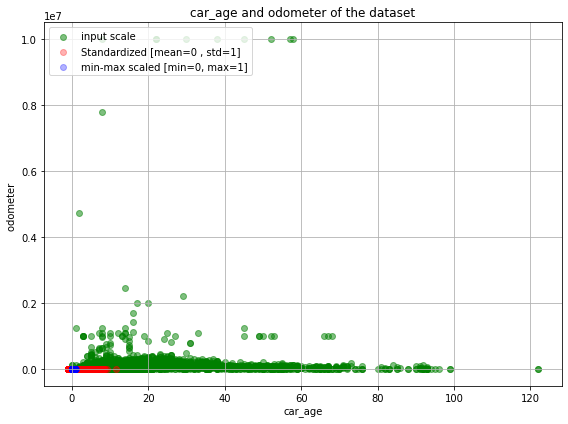

In [23]:
from matplotlib import pyplot as plt
%matplotlib inline

def plot():
    plt.figure(figsize=(8,6))

    plt.scatter(df['car_age'], df['odometer'],
            color='green', label='input scale', alpha=0.5)

    plt.scatter(df_std['car_age'], df_std['odometer'], 
                color='red', label='Standardized [mean=0 , std=1] ', alpha=0.3)

    plt.scatter(df_min_max['car_age'], df_min_max['odometer'],
            color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)

    plt.title('car_age and odometer of the dataset')
    plt.xlabel('car_age')
    plt.ylabel('odometer ')
    plt.legend(loc='upper left')
    plt.grid()

    plt.tight_layout()

plot()
plt.show()

The plot above includes the  datapoints on all three different scales: the input scale where the car_age content was measured in volume-percent (green), the standardized features (red), and the normalized features (blue).




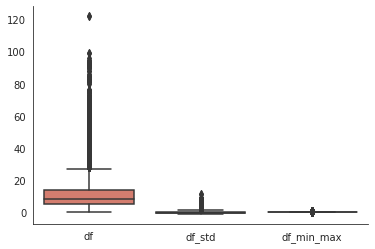

In [41]:
import seaborn as sns

combined_dfs = pd.DataFrame({'car_age_df': df['car_age'],
                             'car_age_df_std': df_std['car_age'],
                             'car_age_df_min_max': df_min_max['car_age']})
sns.set_style('white')
sns.boxplot(data=combined_dfs, palette='flare')
sns.despine()
plt.show()


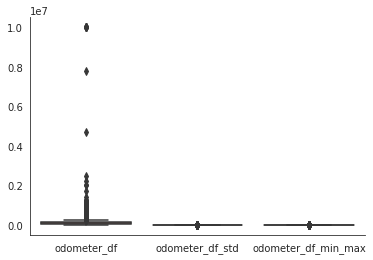

In [42]:
import seaborn as sns

combined_dfs = pd.DataFrame({'odometer_df': df['odometer'],
                             'odometer_df_std': df_std['odometer'],
                             'odometer_df_min_max': df_min_max['odometer']})
sns.set_style('white')
sns.boxplot(data=combined_dfs, palette='flare')
sns.despine()
plt.show()


You can notice how scaling the features brings everything into perspective. The features are now more comparable and will have a similar effect on the learning models.

###4-Robust Scaler
With Robust Scaler, we’re subtracting the median and then scaling the column by the IQR.

- This method centres the median value at zero

- This is the approach most robust to outliers that we will cover.

In [24]:
from sklearn.preprocessing import RobustScaler
df_rob = X_train.copy()
#only scale numeric varaibles in this case rather than the dummy variables for categories 
df_rob.loc[:,['car_age','odometer']] = RobustScaler().fit_transform(df_rob.loc[:, ['car_age','odometer']])

In [25]:
df_rob.describe()

,car_age,odometer
count,15813.000000,15813.000000
mean,0.310680,0.151628
std,1.080276,2.521527
min,-0.888889,-0.887309
25%,-0.333333,-0.491104
50%,0.000000,0.000000
75%,0.666667,0.508896
max,12.666667,104.885786


### Modeling 

However, at the end of the day, the choice of using normalization or standardization will depend on your problem and the machine learning algorithm you are using. There is no hard and fast rule to tell you when to normalize or standardize your data. You can always start by fitting your model to:
- 1-  raw, 
- 2- normalized
- 3-  standardized data 

then comparing the performance for the best results.

**1-KNeighborsRegressor**

In [26]:
#let's do a simple exmaple where we compare results with the different features scaling techniques. We will remove the categorical data for this. 

#the model we will be using is K Nearest Neighbors which can use euclidean distance. 

#we will use year and odometer to predict price 

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

#noscaling 
neigh_am = KNeighborsRegressor(n_neighbors=3)
neigh_am.fit(X_train.loc[:,['car_age','odometer']], y_train)
pred = neigh_am.predict(X_test.loc[:,['car_age','odometer']])

#absolute max 
neigh_am = KNeighborsRegressor(n_neighbors=3)
neigh_am.fit(df_am.loc[:,['car_age','odometer']], y_train)
am_pred = neigh_am.predict(X_test.loc[:,['car_age','odometer']])

#min max (should get same results)
neigh_mm = KNeighborsRegressor(n_neighbors=3)
neigh_mm.fit(df_min_max.loc[:,['car_age','odometer']], y_train)
mm_pred = neigh_mm.predict(X_test.loc[:,['car_age','odometer']])

#standard (z score)
neigh_std = KNeighborsRegressor(n_neighbors=3)
neigh_std.fit(df_std.loc[:,['car_age','odometer']], y_train)
std_pred = neigh_std.predict(X_test.loc[:,['car_age','odometer']])

#robust scaler 
neigh_rob = KNeighborsRegressor(n_neighbors=3)
neigh_rob.fit(df_rob.loc[:,['car_age','odometer']], y_train)
rob_pred = neigh_rob.predict(X_test.loc[:,['car_age','odometer']])



In [48]:
# print('No Scaling: %.3f' % mean_absolute_error(y_test,pred))
# print('Abosolute Max Score: %.3f' % mean_absolute_error(y_test,am_pred))
# print('Min Max Score: %.3f' % mean_absolute_error(y_test,mm_pred))
# print('Standard Scaling Score: %.3f' % mean_absolute_error(y_test,std_pred))
# print('Robust Scaler Score: %.3f' % mean_absolute_error(y_test,rob_pred))

rmse=[]
rmse.append(mean_absolute_error(y_test,pred) )
rmse.append( mean_absolute_error(y_test,am_pred))
rmse.append(mean_absolute_error(y_test,mm_pred))
rmse.append(mean_absolute_error(y_test,std_pred))
rmse.append(mean_absolute_error(y_test,rob_pred))

# visualizing the result
df_reults = pd.DataFrame({'MAE':KNeighborsRegressor},index=['No Scaling','Abosolute Max Score','Min Max Score','standard Scaling','Robust Scaler'])
df_reults


,MAE
No Scaling,10021.848845
Abosolute Max Score,13872.915866
Min Max Score,13872.915866
standard Scaling,14068.828275
Robust Scaler,14195.764879


You can see that scaling the features has brought down the RMSE score . Specifically, the normalized data performs a tad bit better than the standardized data.

**2-Support Vector Regressor**

In [49]:

#let's do a simple exmaple where we compare results with the different features scaling techniques. We will remove the categorical data for this. 

#the model we will be using is SVR. 

#we will use year and odometer to predict price 

from  sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

#noscaling 
svr_am = SVR(kernel='rbf',C=5)
svr_am.fit(X_train.loc[:,['car_age','odometer']], y_train)
pred = svr_am.predict(X_test.loc[:,['car_age','odometer']])

#absolute max 
svm_am = SVR(kernel='rbf',C=5)
svm_am.fit(df_am.loc[:,['car_age','odometer']], y_train)
am_pred = svm_am.predict(X_test.loc[:,['car_age','odometer']])

#min max (should get same results)
svm_mm = SVR(kernel='rbf',C=5)
svm_mm.fit(df_min_max.loc[:,['car_age','odometer']], y_train)
mm_pred = svm_mm.predict(X_test.loc[:,['car_age','odometer']])

#standard (z score)
svm_std = SVR(kernel='rbf',C=5)
svm_std.fit(df_std.loc[:,['car_age','odometer']], y_train)
std_pred = svm_std.predict(X_test.loc[:,['car_age','odometer']])

#robust scaler 
svm_rob = SVR(kernel='rbf',C=5)
svm_rob.fit(df_rob.loc[:,['car_age','odometer']], y_train)
rob_pred = svm_rob.predict(X_test.loc[:,['car_age','odometer']])



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

In [50]:
rmse=[]
rmse.append(mean_absolute_error(y_test,pred) )
rmse.append( mean_absolute_error(y_test,am_pred))
rmse.append(mean_absolute_error(y_test,mm_pred))
rmse.append(mean_absolute_error(y_test,std_pred))
rmse.append(mean_absolute_error(y_test,rob_pred))

# visualizing the result
df_reults = pd.DataFrame({'MAE - SVM':rmse},index=['No Scaling','Abosolute Max Score','Min Max Score','standard Scaling','Robust Scaler'])
df_reults

,MAE
No Scaling,10574.718989
Abosolute Max Score,11708.927932
Min Max Score,11708.927932
standard Scaling,11699.173587
Robust Scaler,11700.884107


We can see that scaling the features does bring down the RMSE score. And the standardized data has performed better than the normalized data.

The sklearn documentation states that SVM, with RBF kernel,  assumes that all the features are centered around zero and variance is of the same order. This is because a feature with a variance greater than that of others prevents the estimator from learning from all the features. Great!


###3-Decision Tree

In [51]:

#let's do a simple exmaple where we compare results with the different features scaling techniques. We will remove the categorical data for this. 

#the model we will be using is DecisionTreeRegressor. 

#we will use year and odometer to predict price 

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

#noscaling 
dt_am =DecisionTreeRegressor(max_depth=10,random_state=27)
dt_am.fit(X_train.loc[:,['car_age','odometer']], y_train)
pred = dt_am.predict(X_test.loc[:,['car_age','odometer']])

#absolute max 
dt_am = DecisionTreeRegressor(max_depth=10,random_state=27)
dt_am.fit(df_am.loc[:,['car_age','odometer']], y_train)
am_pred = dt_am.predict(X_test.loc[:,['car_age','odometer']])

#min max (should get same results)
dt_mm = DecisionTreeRegressor(max_depth=10,random_state=27)
dt_mm.fit(df_min_max.loc[:,['car_age','odometer']], y_train)
mm_pred = dt_mm.predict(X_test.loc[:,['car_age','odometer']])

#standard (z score)
dt_std = DecisionTreeRegressor(max_depth=10,random_state=27)
dt_std.fit(df_std.loc[:,['car_age','odometer']], y_train)
std_pred = dt_std.predict(X_test.loc[:,['car_age','odometer']])

#robust scaler 
dt_rob = DecisionTreeRegressor(max_depth=10,random_state=27)
dt_rob.fit(df_rob.loc[:,['car_age','odometer']], y_train)
rob_pred = dt_rob.predict(X_test.loc[:,['car_age','odometer']])



In [52]:
rmse=[]
rmse.append(mean_absolute_error(y_test,pred) )
rmse.append( mean_absolute_error(y_test,am_pred))
rmse.append(mean_absolute_error(y_test,mm_pred))
rmse.append(mean_absolute_error(y_test,std_pred))
rmse.append(mean_absolute_error(y_test,rob_pred))

# visualizing the result
df_reults = pd.DataFrame({'MAE - DecisionTreeRegressor':rmse},index=['No Scaling','Abosolute Max Score','Min Max Score','standard Scaling','Robust Scaler'])
df_reults

,MAE - SVM
No Scaling,8833.482868
Abosolute Max Score,14535.729955
Min Max Score,14535.729955
standard Scaling,14721.679499
Robust Scaler,14747.108355


You can see that the RMSE score has not moved an inch on scaling the features. So rest assured when you are using tree-based algorithms on your data

**Key Takeaways**

- Feature scaling is an important preprocessing step in machine learning that helps to ensure that all features are on a similar scale, which can improve the performance of algorithms.

- The choice between normalization and standardization depends on the distribution of the data, the algorithm being used, and the context of the problem.

- Normalization is appropriate for data with a skewed distribution, while standardization is appropriate for data with a Gaussian distribution.


**Remember**

1. **Standardization** involves transforming the features such that they have a mean of zero and a standard deviation of one. This is done by subtracting the mean and dividing by the standard deviation of each feature

2. On the other hand, **Normalization** scales the features to a fixed range, usually [0, 1]. This is done by subtracting the minimum value of each feature and dividing by the difference between the maximum value and the minimum value.

##Resources






1- https://www.analyticsvidhya.com/blog/2021/05/feature-scaling-techniques-in-python-a-complete-guide/

2- https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/#:~:text=Normalization%20is%20a%20scaling%20technique,known%20as%20Min%2DMax%20scaling.&text=Here%2C%20Xmax%20and%20Xmin%20are,values%20of%20the%20feature%20respectively.


3- https://www.analyticsvidhya.com/blog/2021/05/feature-scaling-techniques-in-python-a-complete-guide/
